# Linear Separability

This notebook explores linear separability in a dataset with two features. It involves plotting data points, transforming features, and analyzing the importance of nonlinear transformations.

## Overview
The key steps involve determining linear separability, defining a new feature representation, and discussing nonlinear transformations.

## Procedure
- **Dataset Analysis**: Determine if the dataset is linearly separable and justify with a plot.
- **Feature Transformation**: Define a new 1-dimensional representation that makes the dataset linearly separable.
- **Separating Hyperplane**: Describe the separating hyperplane in the new representation space.
- **Nonlinear Transformations**: Discuss the importance of nonlinear transformations in classification problems.

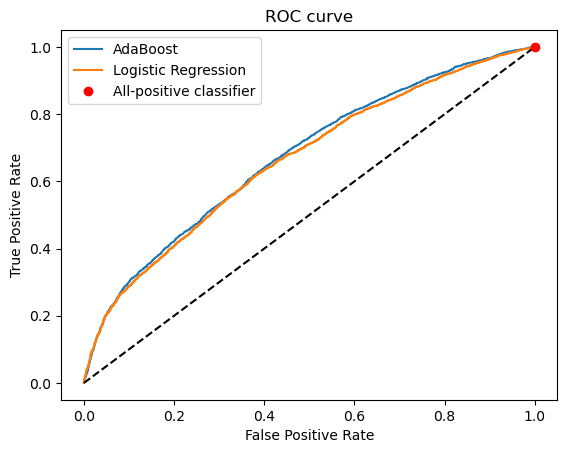

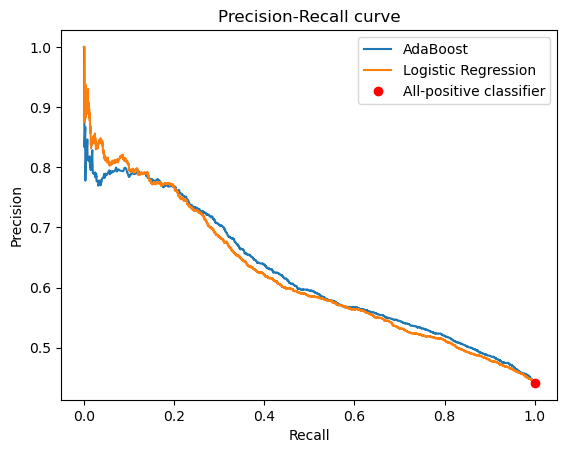

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve
import numpy as np

ada_pred_proba = model_ada.predict_proba(X_test)[:,1]
lr_pred_proba = model_lr.predict_proba(X_test)[:,1]

fpr_ada, tpr_ada, _ = roc_curve(y_test, ada_pred_proba)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba)

pr_ada = precision_recall_curve(y_test, ada_pred_proba)
pr_lr = precision_recall_curve(y_test, lr_pred_proba)


positive_ratio = np.sum(y_test) / len(y_test)

plt.plot(fpr_ada, tpr_ada, label='AdaBoost')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.title('ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1], [1], 'ro', label='All-positive classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

plt.plot(pr_ada[1], pr_ada[0], label='AdaBoost')
plt.plot(pr_lr[1], pr_lr[0], label='Logistic Regression')
plt.plot([1], [positive_ratio], 'ro', label='All-positive classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()


# Problem 3 - Perceptron

This problem focuses on the perceptron algorithm, a foundational model in machine learning for binary classification. The scenario involves a 2-dimensional dataset where the classification boundary between the positive and negative classes is determined by the linear equation $x_1 - x_2 = 0$. Points where $x_1 > x_2$ are classified as positive, and points where $x_1 \leq x_2$ are classified as negative.

**Reference**: For additional insights into implementing the perceptron algorithm from scratch in Python, consult the following resource: "Implementing the Perceptron Algorithm from Scratch in Python" available at https://medium.com/hackernoon/implementing-the-perceptron-algorithm-from-scratch-in-python-48be2d07b1c0. This article may serve as a useful guide for understanding the basic principles and steps involved in coding the perceptron learning algorithm.



## 3.1 Perceptron Algorithm Implementation

- **Task**: Implement the perceptron algorithm without any form of regularization. Begin by generating a training dataset of 10 points within the unit square in the positive quadrant (0,1) for both x1 and x2. Each point should be labeled as positive or negative based on whether x1 is greater than x2. The perceptron's loss function is defined as $L = \max{0, a - y(\mathbf{W} \cdot \mathbf{X})}$, where $a$ is a parameter that distinguishes between the perceptron criterion ($a=0$) and hinge-loss ($a=1$), $\mathbf{W}$ is the weight vector $[w_1, w_2]$, $\mathbf{X}$ is the input vector $[x_1, x_2]$, and $y$ is the class label. Predictions are made using $\hat{y} = \text{sign}(\mathbf{W} \cdot \mathbf{X})$. After implementing the algorithm, train it on the generated dataset and test its performance on 5000 randomly generated points within the same unit square, using the same labeling criteria. (6 points)


Text(0.5, 1.0, 'Genereated Data')

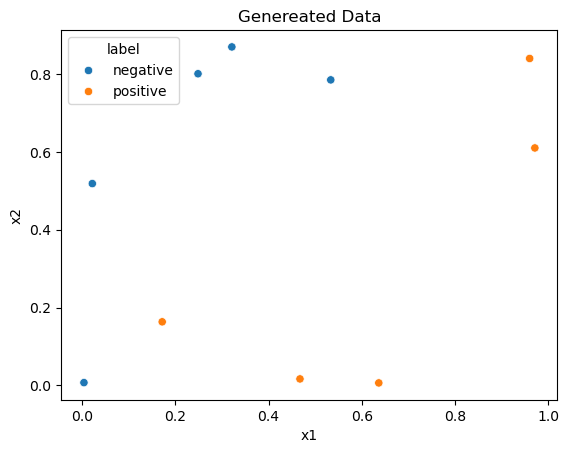

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# np.random.seed()
x1 = np.random.rand(10)
x2 = np.random.rand(10)
labels = np.where(x1 > x2, 'positive', 'negative')
df = pd.DataFrame({'x1': x1, 'x2': x2, 'label': labels})
sns.scatterplot(data=df, x='x1', y='x2', hue='label').set_title('Genereated Data')

### Perceptron

The perceptron's loss function is defined as $L = \max{0, a - y(\mathbf{W} \cdot \mathbf{X})}$, where $a$ is a parameter that distinguishes between the perceptron criterion ($a=0$) and hinge-loss ($a=1$), $\mathbf{W}$ is the weight vector $[w_1, w_2]$, $\mathbf{X}$ is the input vector $[x_1, x_2]$, and $y$ is the class label. Predictions are made using $\hat{y} = \text{sign}(\mathbf{W} \cdot \mathbf{X})$. After implementing the algorithm, train it on the generated dataset and test its performance on 5000 randomly generated points within the same unit square, using the same labeling criteria.

In [ ]:
import debugpy


In [ ]:
#create a sample df with 2 columns, y_pred, and y_true with either -1 or 1
df = pd.DataFrame({'y_true': [1, -1, 1, 1, -1], 'y_pred': [1, -1, 1, 1, 1]})
df['a0'] = 0 - df['y_true'] * df['y_pred']
df['a1'] = 1 - df['y_true'] * df['y_pred']
df

,y_true,y_pred,a0,a1
0,1,1,-1,0
1,-1,-1,-1,0
2,1,1,-1,0
3,1,1,-1,0
4,-1,1,1,2


In [ ]:
debugpy.debug_this_thread()

In [ ]:
import numpy as np
import pandas as pd

def prepare_data(n_samples):
    x1 = np.random.rand(n_samples)
    x2 = np.random.rand(n_samples)
    labels = np.where(x1 > x2, 'positive', 'negative')
    df = pd.DataFrame({'x1': x1, 'x2': x2, 'label': labels})

    X = np.column_stack([x1, x2, np.ones(n_samples)])
    y = np.where(df['label'] == 'positive', 1, -1)

    return X, y, df

def perceptron_loss(W, X, y_true, a=0):
    y_pred = 1 if np.dot(W, X) > 0 else -1
    g = a - y_true * y_pred
    return max(0, a - (y_true * y_pred))


def perceptron_train(X, y, learning_rate=0.01, epochs=4, a=0):

    losses = []
    all_losses = {}
    all_weights = {}
    all_weights2 = []

    W = np.zeros(X.shape[1])  # Ensure W has the correct shape, including bias
    all_weights['init'] = list(W)
    all_weights2.append(list(W))
    for epoch in range(epochs):
        print(f"Epoch {epoch}")
        all_losses[epoch] = []
        all_weights[epoch] = []

        epoch_loss = 0
        for i in range(X.shape[0]):

            loss = perceptron_loss(
                W, X[i], y[i], a)
            epoch_loss += loss

            if loss > 0:
                W += learning_rate * y[i] * X[i]

                # W += learning_rate * -loss
            # W_bias = W[-1]
            # W += learning_rate * -loss * X[i]
            # W[-1] = W[-1] / X[i][-1]
            # W[-1] = W_bias - learning_rate * -loss

            all_weights[epoch].append(list(W))
            all_weights2.append(list(W))
            all_losses[epoch].append(loss)


        losses.append(epoch_loss / X.shape[0])  # Average loss for the epoch

    return W, losses, all_losses, all_weights, all_weights2

# X_train, y_train, train_df = prepare_data(10)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'label': labels})
X_train = np.column_stack([x1, x2, np.ones(10)])
y_train = np.where(df['label'] == 'positive', 1, -1)
# X_train, y_train = x1, x2
W, losses, all_losses, all_weightsold, all_weights = perceptron_train(X_train, y_train, learning_rate=.1, a=1, epochs=10)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


,0,1,2
0,0.000000,0.000000,0.0
1,0.063632,0.000653,0.1
2,0.063246,-0.000078,0.0
4,0.038393,-0.080142,-0.1
5,0.134389,0.003846,0.0
6,0.102275,-0.083111,-0.1
8,0.149000,-0.081430,0.0
10,0.095670,-0.159920,-0.1
11,0.159302,-0.159267,0.0


/var/folders/l3/3msj1f8x6v930zvr96b6w9bh0000gn/T/ipykernel_48703/69718148.py:15: RuntimeWarning: invalid value encountered in divide
  y = (-aw[i][2] - aw[i][0]*x_grid) / aw[i][1]


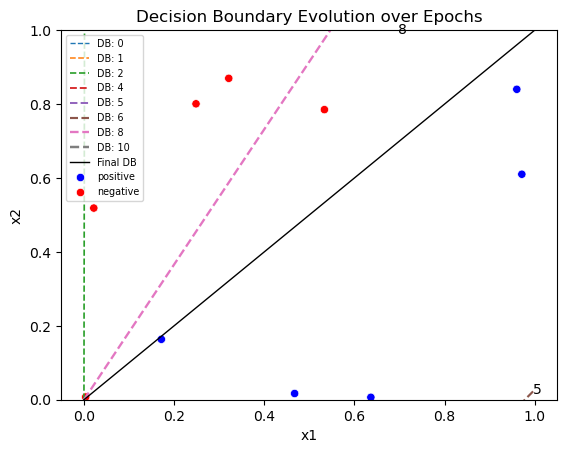

Accuracy: 1.00


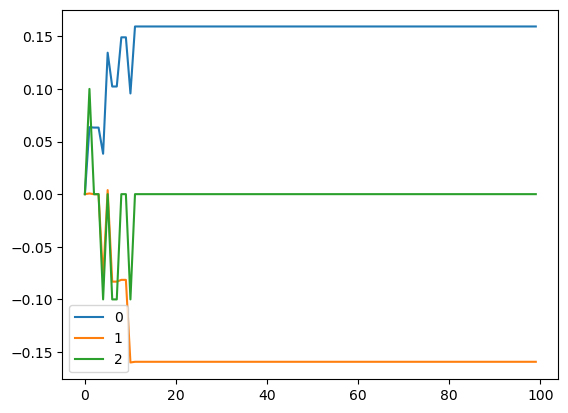

In [ ]:
pd.set_option('display.max_rows', 10)
# run the perceptron
W, losses, all_losses0, all_weightsold, all_weights0 = perceptron_train(X_train, y_train, learning_rate=.1, a=0, epochs=10)

weights = pd.DataFrame(all_weights0[1:])

# weights.plot()
weights = weights.drop_duplicates()
display(weights)
aw = list(weights.values)

fig = plt.figure()
x_grid = np.linspace(0, 1, 10)
for i, idx in enumerate(list(weights.index)[:-1]):
    y = (-aw[i][2] - aw[i][0]*x_grid) / aw[i][1]
    ax = sns.lineplot(x=x_grid, y=y , label=f'DB: {idx}', linewidth=(i/len(aw))+1, linestyle='--')
sns.lineplot(x=x_grid, y=(-W[2] - W[0]*x_grid) / W[1], label=f'Final DB', linewidth=1,color='black' )
sns.scatterplot(data=df[df.label=='positive'], x='x1', y='x2',  markers='o', style='label', color='b')
sns.scatterplot(data=df[df.label=='negative'], x='x1', y='x2',  markers='o', style='label', color='r')

plt.ylim(0, 1)
plt.legend(fontsize='x-small')
# plt.legend([])
for line, name in zip(ax.lines, range(0, len(aw))):
    try:
        # print(( name%3 )*.15)
        ax.annotate(name, xy=(line.get_xdata()[-1] - ( name%5)*.1, line.get_ydata()[-1]), xytext=(5,0), textcoords='offset points', ha='right', va='center')
    except:
        pass
plt.title('Decision Boundary Evolution over Epochs')

plt.show()

pd.DataFrame(all_weights0[1:]).plot()

y_pred = np.sign(np.dot(X_train, W))
acc = (y_pred == y_train).mean()
print(f"Accuracy: {acc:.2f}")

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


,0,1,2
0,0.000000,0.000000,0.0
1,0.063632,0.000653,0.1
2,0.063246,-0.000078,0.0
4,0.038393,-0.080142,-0.1
5,0.134389,0.003846,0.0
6,0.102275,-0.083111,-0.1
8,0.149000,-0.081430,0.0
10,0.095670,-0.159920,-0.1
11,0.159302,-0.159267,0.0


/var/folders/l3/3msj1f8x6v930zvr96b6w9bh0000gn/T/ipykernel_48703/934370289.py:16: RuntimeWarning: invalid value encountered in divide
  y = (-aw[i][2] - aw[i][0]*x_grid) / aw[i][1]


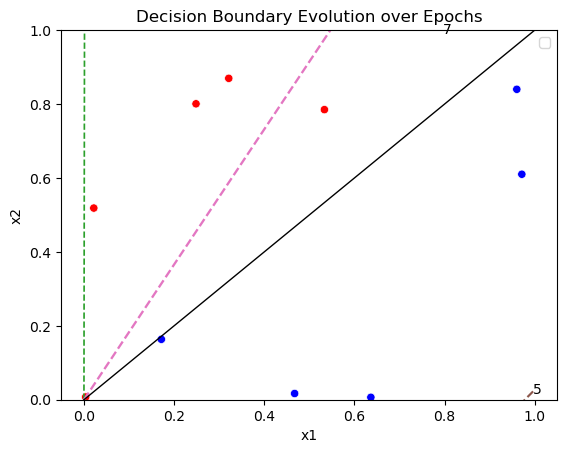

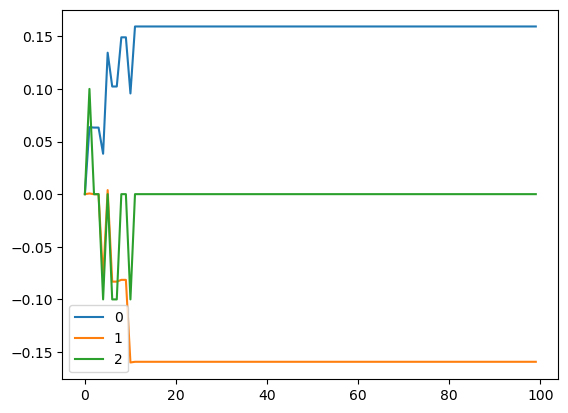

Accuracy: 1.00


In [ ]:
# run the perceptron a=1
W, losses, all_losses, all_weightsold, all_weights = perceptron_train(X_train, y_train, learning_rate=.1, a=1, epochs=10)

weights = pd.DataFrame(all_weights[1:])


weights = weights.drop_duplicates()
aw = list(weights.values)
display(weights)

fig = plt.figure()
x_grid = np.linspace(0, 1, 10)
# print(weights.index)
# print(aw)
for i, idx in enumerate(list(weights.index)[:-2]):
    y = (-aw[i][2] - aw[i][0]*x_grid) / aw[i][1]
    ax = sns.lineplot(x=x_grid, y=y , label=f'DB: {idx}', linewidth=(i/len(aw))+1, linestyle='--')
sns.lineplot(x=x_grid, y=(-W[2] - W[0]*x_grid) / W[1], label=f'Final DB', linewidth=1,color='black' )
sns.scatterplot(data=df[df.label=='positive'], x='x1', y='x2',  markers='o', style='label', color='b')
sns.scatterplot(data=df[df.label=='negative'], x='x1', y='x2',  markers='o', style='label', color='r')

plt.ylim(0, 1)
plt.legend(fontsize='x-small')
plt.legend([])
for line, name in zip(ax.lines, range(0, len(aw))):
    try:
        # print(( name%3 )*.15)
        ax.annotate(name, xy=(line.get_xdata()[-1] - ( name%5)*.1, line.get_ydata()[-1]), xytext=(5,0), textcoords='offset points', ha='right', va='center')
    except:
        pass
plt.title('Decision Boundary Evolution over Epochs')

plt.show()

pd.DataFrame(all_weights[1:]).plot()
plt.show()



y_pred = np.sign(np.dot(X_train, W))
acc = (y_pred == y_train).mean()
print(f"Accuracy: {acc:.2f}")

In [ ]:
import numpy as np

def perceptron_loss(W, X, y_true, a=0):
    y_pred = 1 if np.dot(W, X) >= 0 else -1
    return max(0, a - (y_true * y_pred))

class FlexibleLossPerceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000, a=0):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.a = a
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training process
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                # Calculate the model output
                model_output = np.dot(x_i, self.weights) + self.bias
                y_pred = 1 if model_output >= 0 else -1
                # Calculate loss
                loss = perceptron_loss(np.append(self.weights, self.bias), np.append(x_i, 1), y[idx], self.a)

                # Update weights and bias if there is a loss
                if loss > 0:
                    self.weights += self.learning_rate * (y[idx] - y_pred) * x_i
                    self.bias += self.learning_rate * (y[idx] - y_pred)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

# Example usage

# Example data
# X = np.array([[2, 3], [1, 1], [2, 1], [3, 2]])  # Feature set


X = df.iloc[:,:-1].values
y = np.where(df['label'] == 'positive', 1, -1)

# 0-1 Loss
p1 = FlexibleLossPerceptron(learning_rate=0.01, n_iter=1000, a=0)
p1.fit(X, y)
predictions_01 = p1.predict(X)
print("Predictions with 0-1 Loss:", predictions_01)

# Hinge Loss
p2 = FlexibleLossPerceptron(learning_rate=0.01, n_iter=1000, a=1)
p2.fit(X, y)
predictions_hinge = p2.predict(X)
print("Predictions with Hinge Loss:", predictions_hinge)


Predictions with 0-1 Loss: [-1.  1. -1.  1. -1.  1. -1. -1.  1.  1.]
Predictions with Hinge Loss: [-1.  1. -1.  1. -1.  1. -1. -1.  1.  1.]


In [ ]:
weights
# delete duplicate rows from the last row- the final weights update
weights = weights.drop_duplicates()

,0,1,2
0,0.000000,0.000000,0.0
1,0.062272,0.019683,0.1
2,-0.004888,-0.054308,0.0
3,-0.004888,-0.054308,0.0
4,0.059004,-0.042699,0.1
...,...,...,...
96,0.090804,-0.106026,0.0
97,0.090804,-0.106026,0.0
98,0.090804,-0.106026,0.0
99,0.090804,-0.106026,0.0


<Axes: >

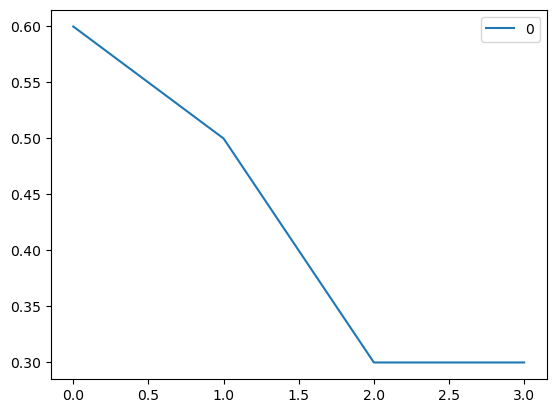

In [ ]:
losses = pd.DataFrame(losses)
losses.plot()

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Trained Weights: [ 0.03660982 -0.18292705  0.1       ]
Losses: [1.0, 0.8, 0.0, 0.0]


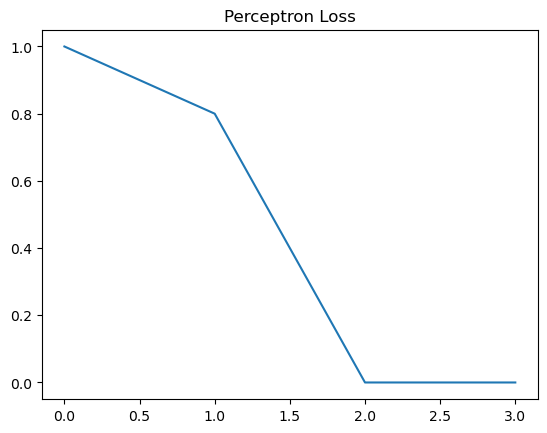

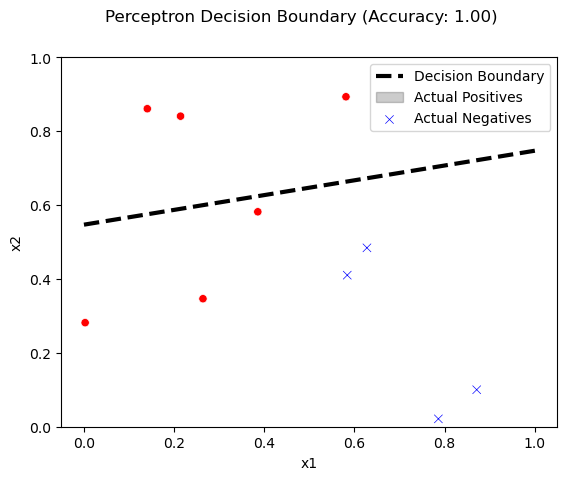

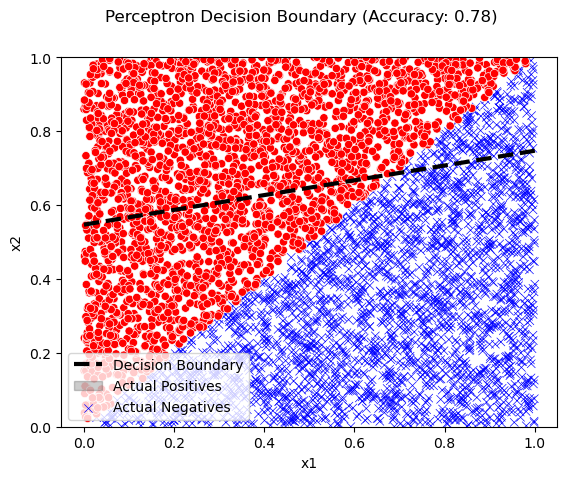

Accuracy: 0.78


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



def plot_data(df, W, accuracy=-1):
    x_grid = np.linspace(0, 1, 10)
    y = (-W[2] - W[0]*x_grid) / W[1]
    sns.lineplot(x=x_grid, y=y , label='Decision Boundary', linewidth=3, color='black', linestyle='--')
    sns.scatterplot(data=df[df.label=='positive'], x='x1', y='x2',  markers='x', style='label', color='b')
    sns.scatterplot(data=df[df.label=='negative'], x='x1', y='x2',  markers='o', style='label', color='r')
    plt.legend(['Decision Boundary', 'Actual Positives', 'Actual Negatives'])
    plt.ylim(0, 1)
    plt.suptitle(f'Perceptron Decision Boundary (Accuracy: {accuracy:.2f})')
    plt.show()

# Training
# X_train, y_train, train_df = prepare_data(10)
W, losses, all_losses, all_weights, aw = perceptron_train(X_train, y_train, learning_rate=.1, a=1)
print("Trained Weights:", W)
print("Losses:", losses)
training_accuracy = (np.where(np.dot(X_train, W) > 0, 1, -1) == y_train).mean()
sns.lineplot(data=losses).set_title('Perceptron Loss')
plt.show()

plot_data(train_df, W, training_accuracy)

# Testing
X_test, y_test, test_df = prepare_data(5000)
y_pred = np.where(np.dot(X_test, W) > 0, 1, -1)
perceptron_accuracy = (y_pred == y_test).mean()

plot_data(test_df, W, perceptron_accuracy)
print(f"Accuracy: {perceptron_accuracy:.2f}")


## 3.2 Hinge-Loss Modification

- **Task**: Modify your perceptron implementation to use the hinge-loss function by setting $a=1)$ in the loss function. Re-train your model on the same initial set of 10 points and evaluate its accuracy on the same set of 5000 test points. This step is to assess the impact of changing the loss function on the perceptron's performance without employing regularization. (5 points)


Trained Weights: [ 0.00374773 -0.00232997  0.        ]
Losses: [0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


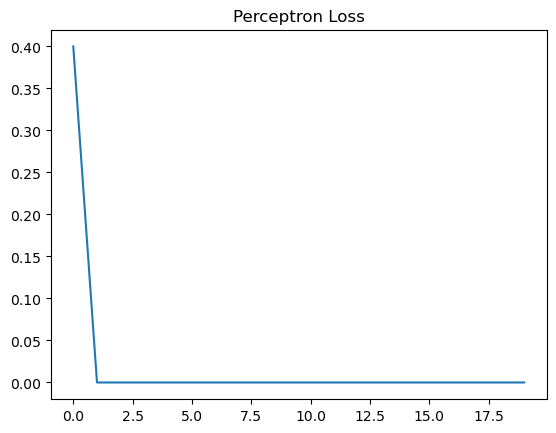

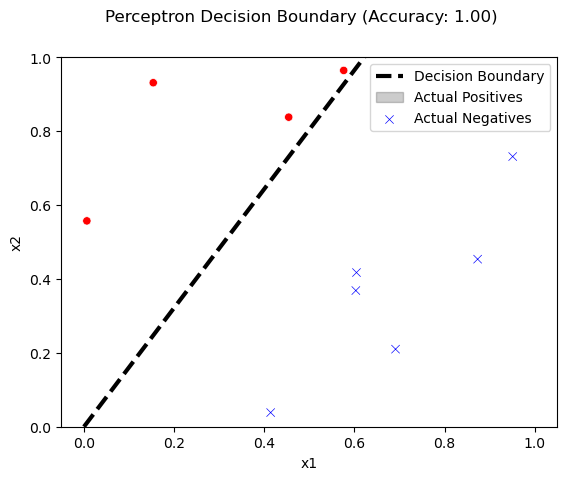

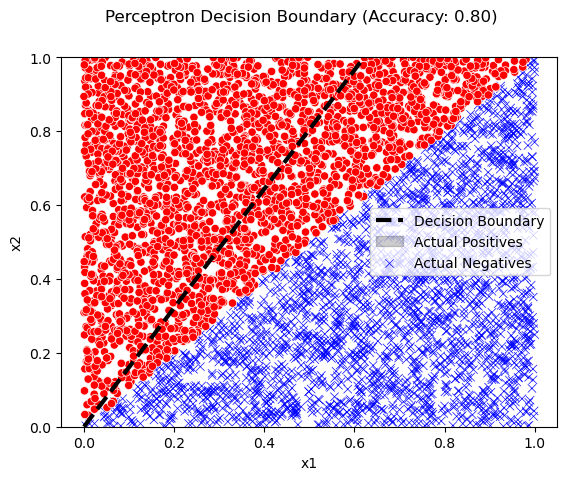

Accuracy: 0.80


In [ ]:
# Hinge Loss implementation into PLA

# Training
X_train, y_train, train_df = prepare_data(10)
W, losses = perceptron_train(X_train, y_train, learning_rate=.01, a=1)
print("Trained Weights:", W)
print("Losses:", losses)

sns.lineplot(data=losses).set_title('Perceptron Loss')
plt.show()

training_accuracy = (np.where(np.dot(X_train, W) > 0, 1, -1) == y_train).mean()
plot_data(train_df, W, training_accuracy)

# Testing
X_test, y_test, test_df = prepare_data(5000)
y_pred = np.where(np.dot(X_test, W) > 0, 1, -1)
hinge_accuracy = (y_pred == y_test).mean()

plot_data(test_df, W, hinge_accuracy)
print(f"Accuracy: {hinge_accuracy:.2f}")


## 3.3 Test Accuracy Comparison

- **Analysis**: Compare the test accuracies obtained using the perceptron criterion versus the hinge-loss. Discuss which loss function led to better performance on the test set and speculate on the reasons for this outcome. Consider the differences between the two loss functions and how they might affect the learning process and the final decision boundary. (2 points)


The perception criterion updates the parameters only when the prediction is incorrect, while the hinge-loss updates the parameters not only when incorrect but also when correct but not within a certain margin.


## 3.4 Stability Analysis

- **Analysis**: Evaluate the stability of the perceptron's classification on the 5000 test instances when trained with a different set of 10 points. Discuss whether the perceptron criterion or the hinge-loss results in more consistent classification performance across different training sets and provide your reasoning. Consider the characteristics of the loss functions and their potential impact on the model's sensitivity to the training data. (2 points)




Average accuracy: 0.88
std: 0.0937


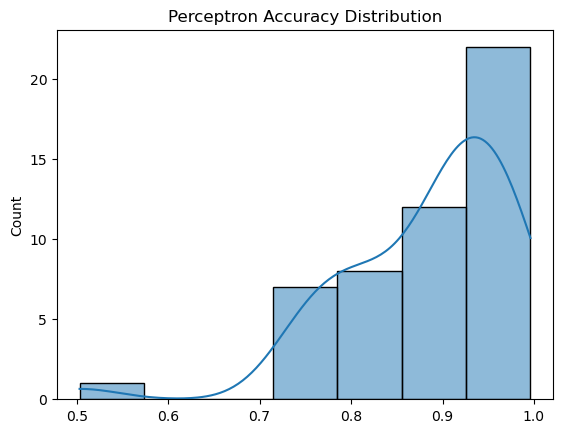

Average accuracy: 0.88
std: 0.0896


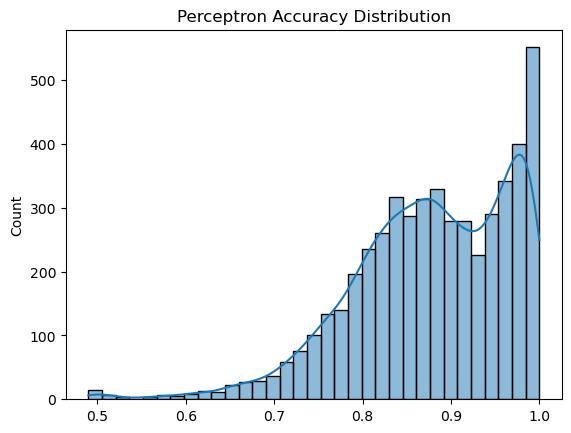

In [ ]:
# Perceptron with Hinge Loss
og_results = []
og_losses = []
for i in range(50):
    X_train, y_train, train_df = prepare_data(10)
    W, losses = perceptron_train(X_train, y_train, learning_rate=.01, a=0)

    X_test, y_test, test_df = prepare_data(5000)
    y_pred = np.where(np.dot(X_test, W) > 0, 1, -1)
    hinge_accuracy = (y_pred == y_test).mean()
    og_results.append(hinge_accuracy)
    og_losses.append(losses)


print(f"Average accuracy: {np.mean(og_results):.2f}")
print(f"std: {np.std(og_results):.4f}")

sns.histplot(og_results, kde=True).set_title('Perceptron Accuracy Distribution')
plt.show()
# Perceptron with Perceptron Loss
hinge_results = []
hinge_losses = []
for i in range(5000):
    X_train, y_train, train_df = prepare_data(10)
    W, losses = perceptron_train(X_train, y_train, learning_rate=1, a=1)

    X_test, y_test, test_df = prepare_data(5000)
    y_pred = np.where(np.dot(X_test, W) > 0, 1, -1)
    hinge_accuracy = (y_pred == y_test).mean()
    hinge_results.append(hinge_accuracy)
    hinge_losses.append(losses)


print(f"Average accuracy: {np.mean(hinge_results):.2f}")
print(f"std: {np.std(hinge_results):.4f}")
sns.histplot(hinge_results, kde=True).set_title('Perceptron Accuracy Distribution')
plt.show()
